In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [173]:
data = pd.read_csv('Dataset/heart_attack.csv')

Visualisasi Data

In [174]:
data.sample(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
2,55,1,64,160,77,270.0,1.99,0.003,negative
300,42,1,82,120,80,111.0,1.41,0.003,negative
729,53,1,66,94,63,202.0,2.84,0.003,negative
269,60,0,61,99,62,92.0,43.83,0.008,positive
1118,40,0,85,140,82,106.0,2.33,0.003,negative
15,61,1,81,118,66,134.0,1.49,0.017,positive
257,62,1,69,111,70,68.0,13.97,0.292,positive
879,48,1,90,111,65,117.0,1.13,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
548,65,1,76,151,78,100.0,8.38,0.015,positive


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [176]:
print("Total Baris: ",data.shape[0])
print("Total Kolom: ",data.shape[1])

Total Baris:  1319
Total Kolom:  9


Menghilangkan null values (data kosong)

In [177]:
data.isnull()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False


In [178]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

Cara lain untuk mengecek null, yaitu di cek per kolom satu per satu

In [179]:
data.loc[data['age'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [180]:
data.loc[data['gender'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [181]:
data.loc[data['impluse'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [182]:
data.loc[data['pressurehight'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [183]:
data.loc[data['pressurelow'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [184]:
data.loc[data['glucose'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [185]:
data.loc[data['kcm'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [186]:
data.loc[data['troponin'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [187]:
data.loc[data['class'].isnull()]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


### **Cek Duplikasi Data**



In [188]:
data_dup = data.duplicated().any()
print(data_dup)

False


Mengatasi duplikasi data

In [189]:
data = data.drop_duplicates()

Cek lagi data shapenya setelah proses remove data duplicate
(setelah dicek lagi, terdapat perubahan pada rows(baris) atau tidak? )

In [190]:
data.shape

(1319, 9)

### Outlier
(data yang nilainya jauh dari populasi), untuk contoh dilakukan perhitungan outlier untuk variable age


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
97     19       0       62            114           69    240.0  300.000   
500    19       0       70            117           76     91.0   36.240   
896   100       1       60            209           75    329.0    5.660   
899    14       0       89            111           57    133.0    2.620   
1039  103       0       86            146           92    120.0   69.320   
1126  103       0       56            171           56    150.0   51.960   
1269   19       1       68            116           74     99.0    0.606   

      troponin     class  
97       0.004  positive  
500      0.025  positive  
896      0.840  positive  
899      0.012  negative  
1039     0.059  positive  
1126     0.044  positive  
1269     0.003  negative  




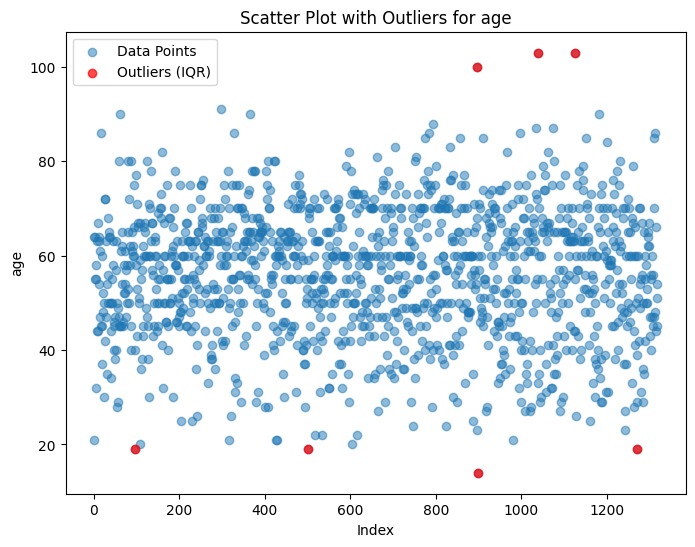

In [191]:
import pandas as pd
from scipy import stats

# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'age'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index) # data outlier drop

In [192]:
data.shape

(1312, 9)


Outliers using IQR Method:
Empty DataFrame
Columns: [age, gender, impluse, pressurehight, pressurelow, glucose, kcm, troponin, class]
Index: []




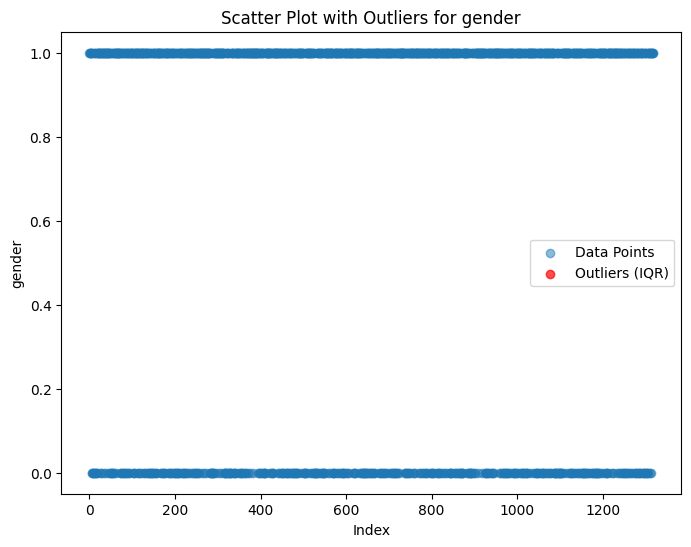

In [193]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'gender'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [194]:
data.shape

(1312, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
21     48       1      135             98           60    100.0   94.790   
30     54       1      125            131           82     95.0    1.310   
63     45       1     1111            141           95    109.0    1.330   
125    47       1      125            121           60     89.0    2.270   
221    63       1      120            140           90    100.0   98.480   
222    55       1      122            147           95     96.0    3.860   
223    63       1      119            170          107    129.0    2.610   
287    44       0      117            112           74    113.0    2.640   
346    60       1      134            111           69    163.0    3.080   
351    69       1      119            113           79    184.0    8.870   
457    65       1      132            125           74    196.0    1.420   
459    65       0      125             92           60    13

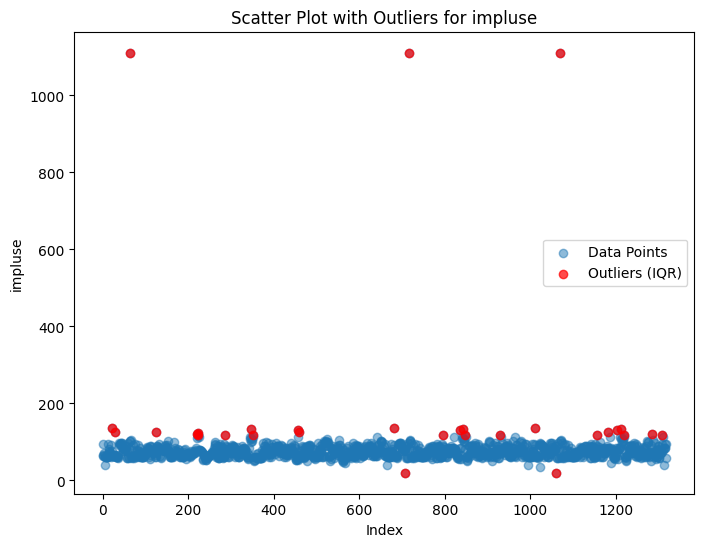

In [195]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'impluse'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [196]:
data.shape

(1282, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
7      63       1       60            214           82     87.0  300.000   
12     64       1       60            199           99     92.0    3.430   
89     61       1       60            202           88    111.0    0.633   
209    60       1       68             42           64    106.0    0.879   
220    60       0      110            220          128    101.0    1.280   
311    63       1       74            208          100    100.0    2.540   
411    74       0       90            198           48    102.0   38.940   
427    58       0       69            214           88     95.0  185.100   
428    21       1       85            204           84     93.0    2.710   
429    44       0       65            200           80    261.0  207.500   
486    63       1       74            223          118    161.0    2.970   
645    47       0       81            200          110     9

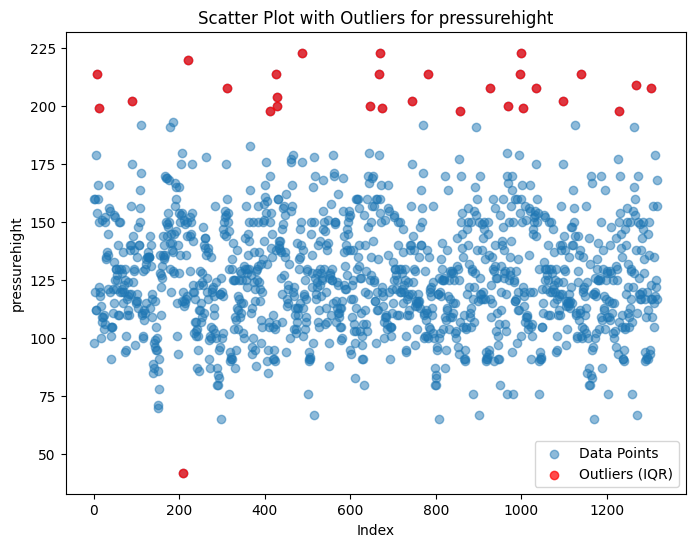

In [197]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'pressurehight'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [198]:
data.shape

(1253, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
179    68       1       67            191          110    165.0   2.58   
404    72       1       79            159          110    175.0   2.92   
514    72       1       60            178          109    156.0  17.04   
893    54       0       65            191          110    140.0   2.59   
1203   65       1       77             76          154     93.0   3.81   
1264   60       1       65            191          110    131.0   3.43   

      troponin     class  
179      0.010  negative  
404      1.550  positive  
514      0.627  positive  
893      0.540  positive  
1203     0.029  positive  
1264     0.018  positive  




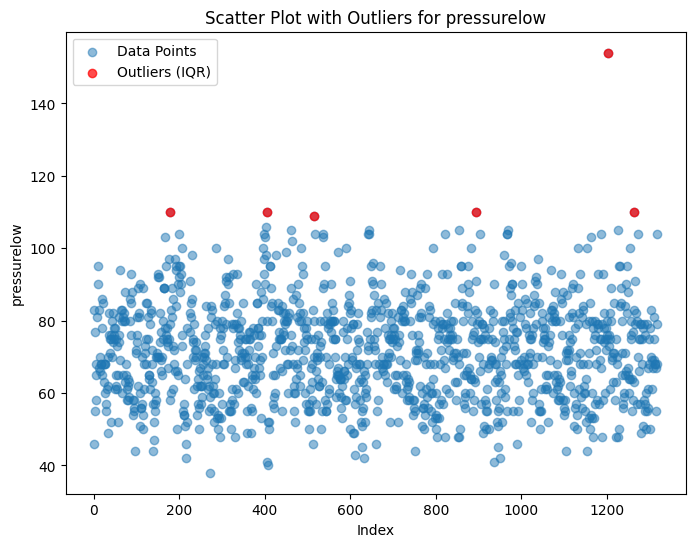

In [199]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'pressurelow'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [200]:
data.shape

(1247, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
1      21       1       94             98           46    296.0   6.750   
4      55       1       64            112           65    300.0   1.080   
14     47       1       76            120           70    319.0   2.570   
20     60       1       92            151           78    301.0   1.600   
31     35       1       62            137           61    321.0   4.580   
...   ...     ...      ...            ...          ...      ...     ...   
1265   41       1       83            153           91    302.0   1.420   
1274   70       1      103            126           75    541.0   0.665   
1294   50       0       79             92           55    415.0  16.950   
1310   70       0       80            135           75    351.0   2.210   
1317   54       1       58            117           68    443.0   5.800   

      troponin     class  
1        1.060  positive  
4        0.003  n

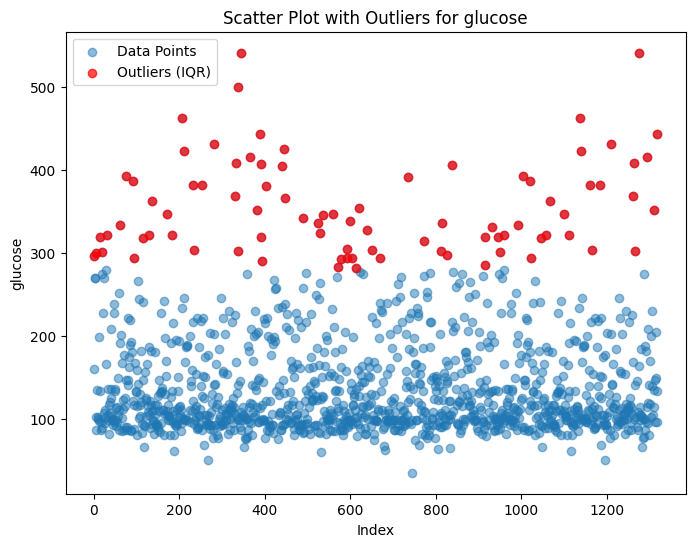

In [201]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'glucose'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [202]:
data.shape

(1162, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
3      64       1       70            120           55    270.0   13.87   
23     30       1       63            110           68    107.0   50.46   
24     50       1       63            104           63    269.0   38.72   
28     47       0       66            134           57    279.0  300.00   
39     34       1       96            105           75    136.0   15.23   
...   ...     ...      ...            ...          ...      ...     ...   
1280   31       1       72            117           49    184.0  300.00   
1291   58       1       98             91           50    182.0   15.23   
1306   60       0       78            109           69    230.0   19.47   
1309   47       1       94            105           81    135.0   36.24   
1318   51       1       94            157           79    134.0   50.89   

      troponin     class  
3        0.122  positive  
23       0.003  p

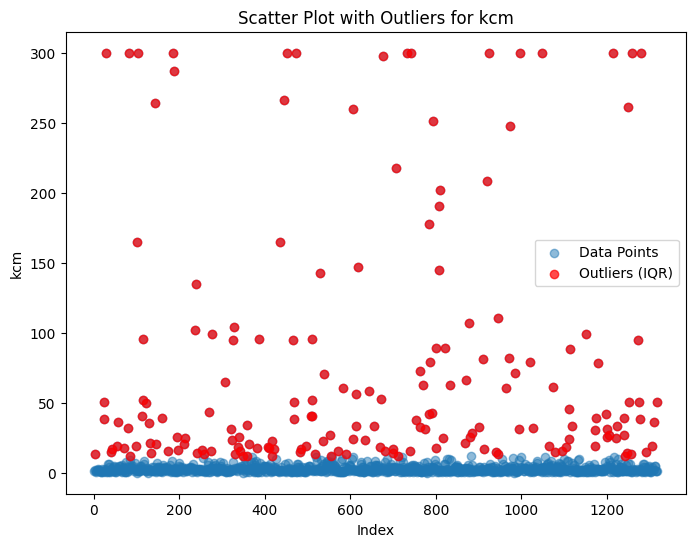

In [203]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'kcm'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

In [204]:
data.shape

(983, 9)


Outliers using IQR Method:
      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
16     86       0       73            114           68     87.0  1.110   
22     52       1       76            109           85    227.0  0.665   
25     72       1       64            106           68    111.0  2.110   
29     63       1       66            135           55    166.0  0.493   
34     50       1       61            136           70    136.0  1.370   
...   ...     ...      ...            ...          ...      ...    ...   
1300   43       1       90             95           50    118.0  1.330   
1304   56       0       68            123           70    102.0  2.280   
1305   47       1       71            117           61    140.0  4.390   
1307   56       1       75            157           67    104.0  2.410   
1316   45       1       85            168          104     96.0  1.240   

      troponin     class  
16       0.776  positive  
22       0.491  positive  
25

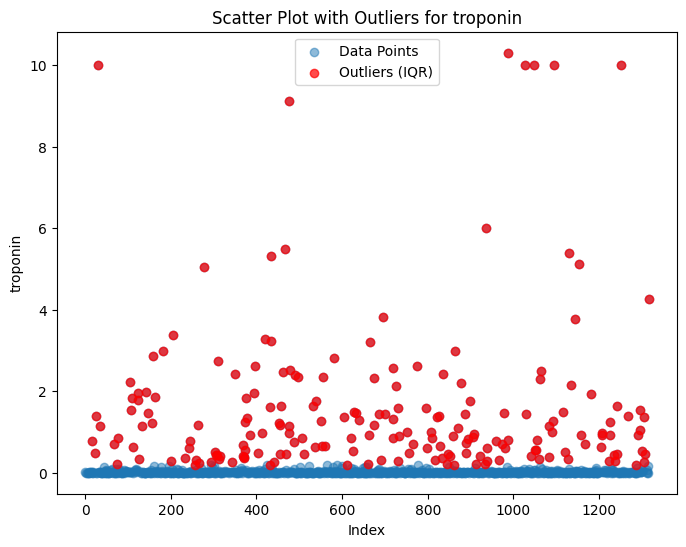

In [205]:
# Specify the column you want to analyze for outliers (e.g., 'age')
column_name = 'troponin'

# Method 2: IQR (Interquartile Range) Method
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers_iqr = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("\nOutliers using IQR Method:")
print(outliers_iqr)

print("\n")
# # Create a box plot to visualize outliers
# plt.figure(figsize=(8, 6))
# plt.boxplot(data[column_name])
# plt.title(f'Box Plot for {column_name}')
# plt.ylabel(column_name)
# plt.show()

# Create a scatter plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outliers_iqr.index, outliers_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outliers_iqr.index)

Cek Data yang Unik

In [206]:
data.shape

(788, 9)

In [207]:
# Find unique values in the 'class' column
unique_classes = data['class'].unique()

# Print the unique values
print("Data Target:", unique_classes)

Data Target: ['negative' 'positive']


Encoding (mengubah data target menjadi numerik agar mempermudah komputasi)

In [208]:
data['class'] = data['class'].replace({'negative': 0, 'positive': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            788 non-null    int64  
 1   gender         788 non-null    int64  
 2   impluse        788 non-null    int64  
 3   pressurehight  788 non-null    int64  
 4   pressurelow    788 non-null    int64  
 5   glucose        788 non-null    float64
 6   kcm            788 non-null    float64
 7   troponin       788 non-null    float64
 8   class          788 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 61.6 KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2200\4126458018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'negative': 0, 'positive': 1})


In [209]:
# Select the columns you want to normalize
columns_to_normalize = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
x_data = data[columns_to_normalize]
x_data.sample(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
661,64,0,64,160,77,97.0,1.52,0.051
865,77,0,90,110,65,137.0,3.12,0.043
264,53,0,94,126,65,105.0,2.38,0.003
238,54,0,69,103,74,154.0,1.77,0.004
1125,55,0,75,144,78,133.0,1.79,0.011
1023,77,0,94,91,52,116.0,1.42,0.026
779,64,1,82,138,93,77.0,8.08,0.021
591,52,0,62,127,65,99.0,3.70,0.007
622,47,0,82,103,58,89.0,1.66,0.004
843,60,0,111,125,71,151.0,3.53,0.003


In [210]:
y_target = data['class']
y_target.head()

0    0
2    0
5    0
6    0
8    0
Name: class, dtype: int64

In [211]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the selected columns using Min-Max scaling
scaler = MinMaxScaler()
x_data_normalized = scaler.fit_transform(x_data)
x_data_normalized = pd.DataFrame(x_data_normalized, columns=columns_to_normalize)

x_data_normalized.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.614286,1.0,0.3750,0.742188,0.671642,0.512295,0.127292,0.052632
1,0.485714,1.0,0.3500,0.742188,0.582090,0.963115,0.143644,0.005263
2,0.528571,0.0,0.3125,0.367188,0.298507,0.213115,0.129873,0.010526
3,0.157143,0.0,0.0500,0.890625,0.447761,0.274590,0.033480,0.005263
4,0.328571,0.0,0.3000,0.695312,0.641791,0.409836,0.174628,0.010526


In [212]:
data['class'].value_counts()

class
0    446
1    342
Name: count, dtype: int64

Plot Data

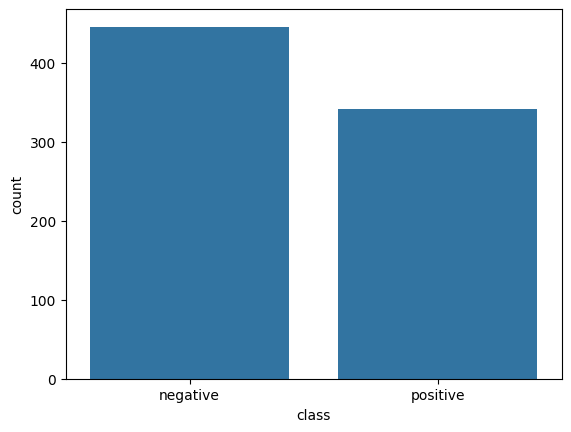

In [213]:
sns.countplot(x='class', data=data)
plt.xticks([0,1],['negative','positive'])
plt.show()

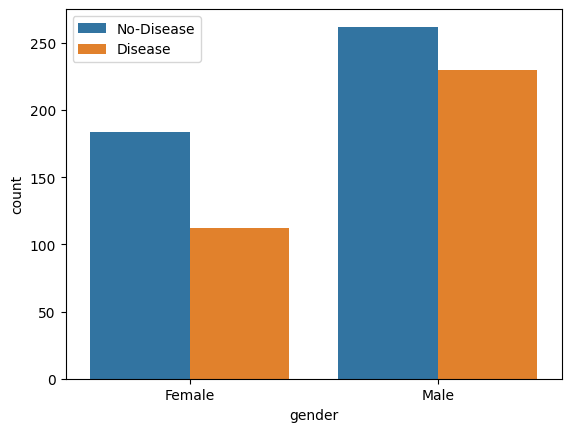

In [214]:
sns.countplot(x='gender', hue="class", data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease']) #ini dari matplotlib.pyplot #merupakan label data dalam plot agar lebih mempermudah kita dalam membaca data.
plt.show() #menampilkan data visual

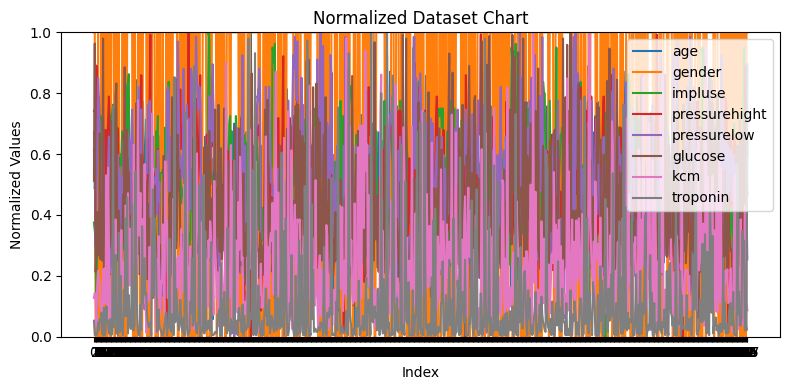

In [215]:
# Create a chart to visualize the normalized data
fig, ax = plt.subplots(figsize=(8, 4))

for column in columns_to_normalize:
    ax.plot(x_data_normalized[column], label=column)

ax.set_xticks(range(len(x_data_normalized)))
ax.set_xticklabels(x_data_normalized.index)
ax.set_ylim(0, 1)
ax.set_xlabel("Index")
ax.set_ylabel("Normalized Values")
ax.set_title("Normalized Dataset Chart")
ax.legend()
plt.tight_layout()
plt.show()

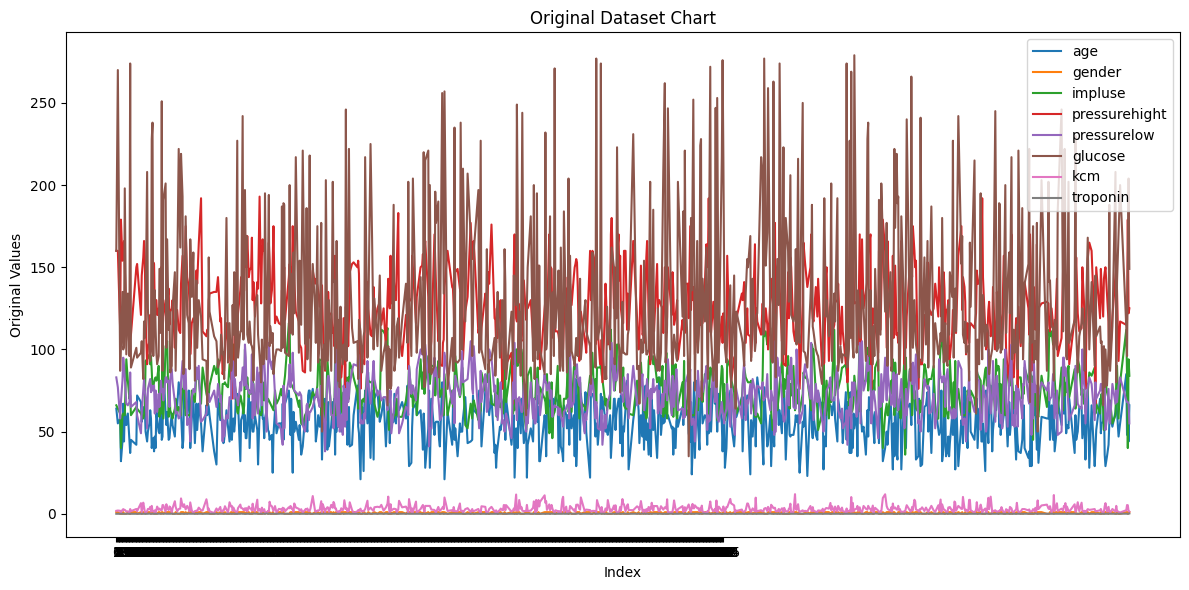

In [216]:
# Load your dataset



# Select the columns you want to plot
columns_to_plot = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
x_data_original = data[columns_to_plot]

# Create a chart to visualize the original data
fig, ax = plt.subplots(figsize=(12, 6))

for column in columns_to_plot:
    ax.plot(x_data_original[column], label=column)

ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index)
ax.set_xlabel("Index")
ax.set_ylabel("Original Values")
ax.set_title("Original Dataset Chart")
ax.legend()
plt.tight_layout()
plt.show()

In [217]:
data[data.impluse>1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class


In [218]:
from sklearn.model_selection import train_test_split

#70 : 30
X_train, X_test, y_train, y_test = train_test_split(
    x_data_normalized, y_target, test_size=0.3, random_state=42
)

# **K-Fold Cross Validation**

In [219]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [220]:
from sklearn import tree

DecisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                                          max_depth=4, max_features=None, max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, splitter='best')
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [221]:
from sklearn.metrics import accuracy_score

accuracy_scores = []

# Melakukan k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    # Memisahkan data training dan validation untuk fold saat ini
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Melatih model pada data training fold saat ini
    DecisionTree.fit(X_train_fold, y_train_fold)

    # Mengevaluasi model pada data validation fold saat ini
    y_val_pred = DecisionTree.predict(X_val_fold)

    # Menghitung dan menyimpan skor akurasi
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores.append(accuracy)

# Menampilkan skor akurasi untuk setiap fold
for i, accuracy in enumerate(accuracy_scores):
    print(f"Accuracy for fold {i+1}: {accuracy}")

# Menghitung rata-rata skor akurasi dari seluruh fold
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy across all folds:", average_accuracy)

Accuracy for fold 1: 0.9819819819819819
Accuracy for fold 2: 1.0
Accuracy for fold 3: 0.9636363636363636
Accuracy for fold 4: 0.9818181818181818
Accuracy for fold 5: 1.0
Average accuracy across all folds: 0.9854873054873055


In [222]:
y_pred = DecisionTree.predict(X_test)
treeAccuracy = accuracy_score(y_pred, y_test)
print(treeAccuracy)

0.9873417721518988


**Confusion Matrix**

              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       138
    positive       0.97      1.00      0.99        99

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237



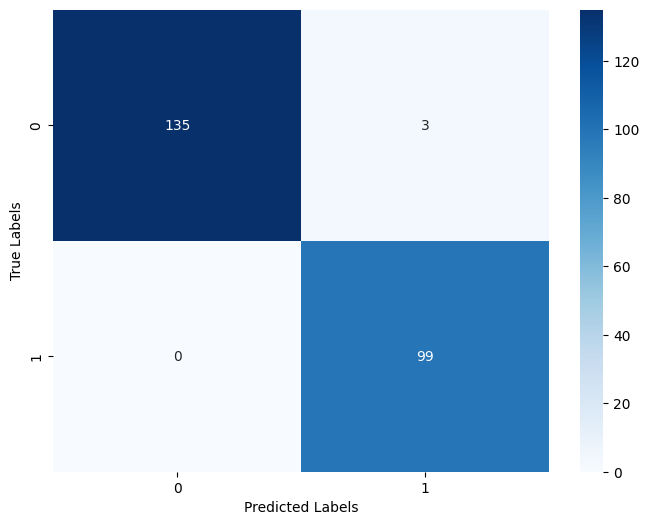

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # Import library untuk menampilkan Confucion Matrix
import seaborn as sns # Import library visualisasi untuk Confucion Matrix
import matplotlib.pyplot as plt

# Mengitung Confucion Matrix dari hasil testing
y_pred = DecisionTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

class_names=['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=class_names))

# Menampilkan Confucion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Visualisasi Data

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

# Contoh DecisionTree model untuk menghindari NameError
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit([[1, 0, 0, 120, 80, 100, 20, 0.1]], [0])  # Data dummy untuk pelatihan

# Ekspor data pohon keputusan ke format DOT
dot_data = export_graphviz(
    decision_tree=DecisionTree,
    max_depth=5,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=[
        "age",
        "gender",
        "impluse",
        "pressurehight",
        "pressurelow",
        "glucose",
        "kcm",
        "troponin"
    ],
    class_names=["negative", "positive"],
)

# Membuat grafik dari data DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Menampilkan pohon keputusan sebagai gambar
if graph:  # Periksa apakah grafik berhasil dibuat
    png_image = graph.create_png()
    display(Image(png_image))
else:
    print("Error: Gagal membuat grafik dari data DOT. Pastikan GraphViz sudah diinstal.")
